##### Copyright 2019 The TensorFlow IO Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 医療画像処理向けに DICOM ファイルをデコードする

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/io/tutorials/dicom"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">View on TensorFlow.org</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/io/tutorials/dicom.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"> Google Colab で実行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/io/tutorials/dicom.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">View source on GitHub</a></td>
      <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/io/tutorials/dicom.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">Download notebook</a></td>
</table>

## 概要

このチュートリアルでは、TensorFlow IO で `tfio.image.decode_dicom_image` を使用し、TensorFlow で DICOM ファイルをデコードする方法を説明します。

## セットアップと使用方法

#### DICOM 画像のダウンロード

このチュートリアルでは、[NIH Chest X-ray データセット](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest)の DICOM 画像を使用します。

NIH Chest X-ray データセットには、100,000 件の匿名化された胸部レントゲン画像が PNG 形式で含まれています。NIH Clinical Center が提供しているデータセットで、[こちらのリンク](https://nihcc.app.box.com/v/ChestXray-NIHCC)からダウンロードできます。

Google Cloud でも、DICOM バージョンの画像が提供されています。[Cloud Storage](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest) で入手可能です。

このチュートリアルでは、[GitHub リポジトリ](https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm)より、データセットのサンプルファイルをダウンロードします。

注意: データセットの詳細については、次のリファレンスをご覧ください。

- Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers, ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases, IEEE CVPR, pp. 3462-3471, 2017


In [2]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   164    0   164    0     0    340      0 --:--:-- --:--:-- --:--:--   340


  1 1024k    1 11886    0     0   8957      0  0:01:57  0:00:01  0:01:56  8957

100 1024k  100 1024k    0     0   716k      0  0:00:01  0:00:01 --:--:-- 9836k


-rw-rw-r-- 1 kbuilder kokoro 1049332 Feb 13 02:53 dicom_00000001_000.dcm


### 必要なパッケージをインストールし、ランタイムを再起動する

In [3]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x 
except:
  pass

In [4]:
!pip install -q tensorflow-io

### DICOM 画像をデコードする

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

Text(0.5, 1.0, 'lossy image')

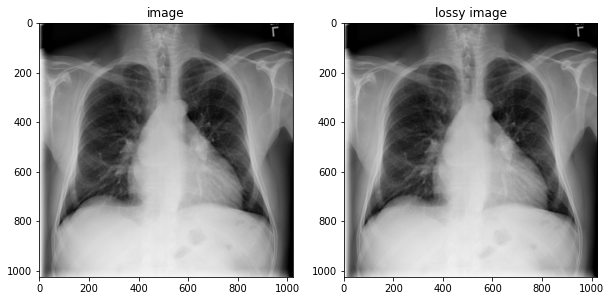

In [6]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

## ドキュメント

このパッケージには、`DCMTK` 関数をラッピングする 2 つの演算があります。`decode_dicom_image` はDICOM ファイルのピクセルデータをデコードし、`decode_dicom_data` はタグ情報をデコードします。`tags` には `tags.PatientsName` などの有用な DICOM タグが含まれます。タグ表記は、[`pydicom`](https://pydicom.github.io/) dicom パッケージから借りだされたものです。

### DICOM 画像データを取得する

```python
io.dicom.decode_dicom_image(     contents,     color_dim=False,     on_error='skip',     scale='preserve',     dtype=tf.uint16,     name=None )
```

- **`contents`**: 文字列型のテンソルです。0 次元。バイト文字列でエンコードされた DICOM ファイルです。
- **`color_dim`**: オプションの `bool` です。デフォルトは `False` です。`True` の場合、3 つ目のチャンネルが 3 次元テンソルを形成するすべての画像にアペンドされます。1024 x 1024 グレースケール画像は 1024 x 1024 x 1 となります。
- **`on_error`**: デフォルトは `skip` です。この属性は、画像を開く際にエラーとなった場合、または出力型がすべての可能な入力値に対応できない場合の動作を確立します。たとえば、ユーザーが出力 dtype を `tf.uint8` に設定しているが、dicom 画像は `tf.uint16` 型を保存する場合などが該当します。`strict` はエラーをスローします。`skip` は 1 次元の空のテンソルを返します。`lossy` は、`scale` 属性経由で値をスケールしながら演算を続けます。
- **`scale`**:  デフォルトは `preserve` です。この属性は、入力値のスケールにどのように対処するかを指定します。`auto` は、入力値を自動スケールしますが、出力型が整数である場合、`auto` は、最大出力スケールを使用します。たとえば、[0, 255] の値を格納する `uint8` は、[0,65535] の `uint16` を満たすまで直線に伸ばされ、出力が浮動小数である場合、`auto` は [0,1] にスケールします。`preserve` は値をそのまま保持し、最大可能出力より大きな入力値は切り取られます。
- **`dtype`**: オプションの `tf.DType` で、`tf.uint8, tf.uint16, tf.uint32, tf.uint64, tf.float16, tf.float32, tf.float64` から指定されます。デフォルトは `tf.uint16` です。
- **`name`**: 演算の名前です（オプション）。

**戻り値**: `dtype` 型の `Tensor`で、形状は DICOM ファイルによって決定されます。

### DICOM タグデータを取得する

```python
io.dicom.decode_dicom_data(     contents,     tags=None,     name=None )
```

- **`contents`**: 文字列型のテンソルです。0 次元。バイト文字列でエンコードされた DICOM ファイルです。
- **`tags`**: 任意の次元の `tf.uint32` 型のテンソルです。`uint32` の数値は DICOM タグに直接マッピングされます。
- **`name`**: 演算の名前です（オプション）。

**戻り値**: `tf.string` 型の `Tensor` で、`tags` と同じ形状です。dicom タグが文字列のリストである場合、1 つの文字列に結合され、二重バックスラッシュ `\` で区切られます。タグが数値のリストである場合には [DCMTK](https://support.dcmtk.org/docs/) にバグがあり、第 0 要素のみが文字列として返されます。

### Bibtex

このパッケージが役立った場合は、どうぞ以下のように引用してください。

```
@misc{marcelo_lerendegui_2019_3337331,   author       = {Marcelo Lerendegui and                   Ouwen Huang},   title        = {Tensorflow Dicom Decoder},   month        = jul,   year         = 2019,   doi          = {10.5281/zenodo.3337331},   url          = {https://doi.org/10.5281/zenodo.3337331} }
```

### ライセンス情報

Copyright 2019 Marcelo Lerendegui, Ouwen Huang, Gradient Health Inc.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.